In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GR_v10_Tested.csv")

In [ ]:
df.shape

(17714, 735)

# Creating our dataframe

In [4]:
#df_ok = df[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B1_13.1','B1_14.1','B8.1']]

df_ok = df[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1']]

In [ ]:
df_ok.shape

(17714, 13)

# Data Visualization

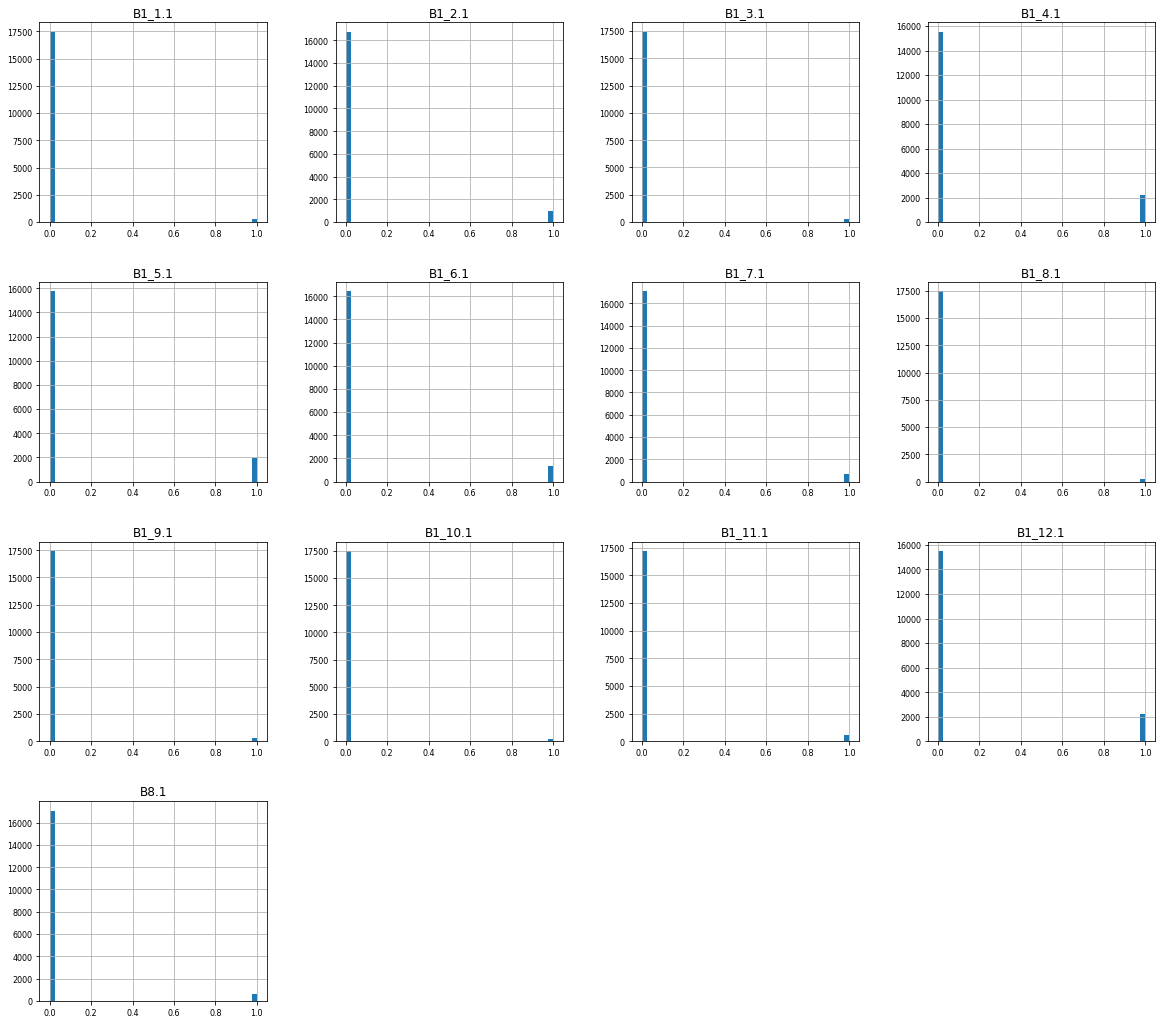

In [ ]:
df_ok.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

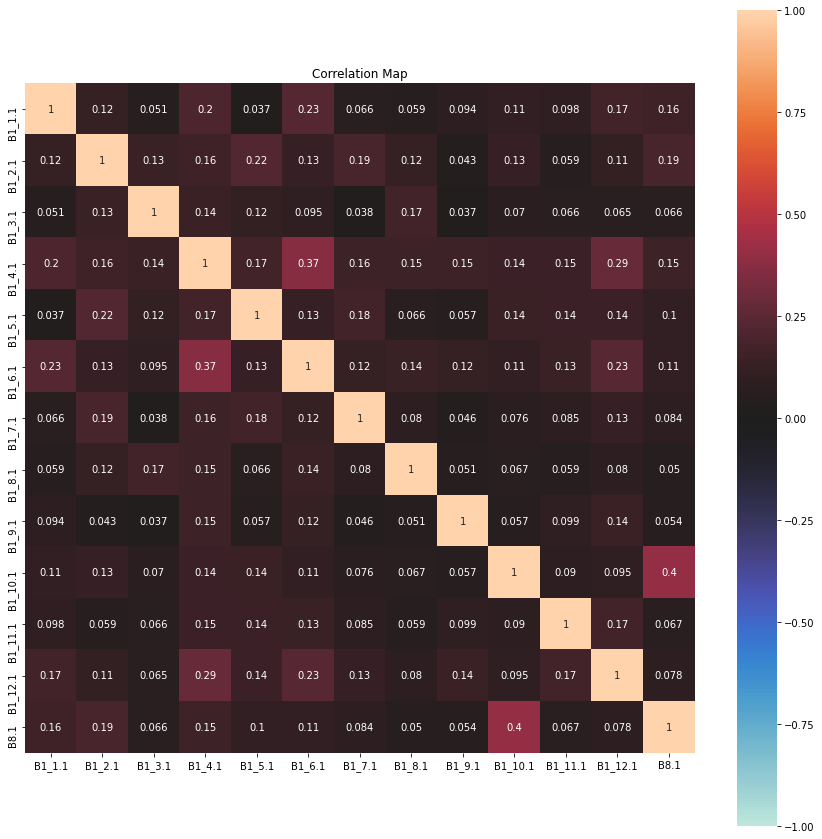

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_ok.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

### Output

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fc0ec8610>]],
      dtype=object)

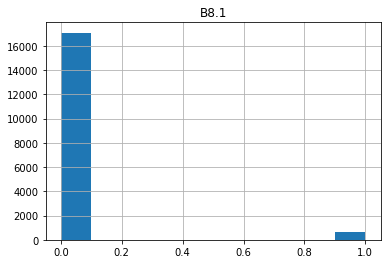

In [ ]:
df_ok.hist('B8.1')

In [ ]:
freq = df_ok.groupby(['B8.1']).count()
freq

,B1_1.1,B1_2.1,B1_3.1,B1_4.1,B1_5.1,B1_6.1,B1_7.1,B1_8.1,B1_9.1,B1_10.1,B1_11.1,B1_12.1
B8.1,,,,,,,,,,,,
0,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087
1,627,627,627,627,627,627,627,627,627,627,627,627


Positive in the last 14 days -> 627

Negative in the last 14 days -> 17087

# Training & Test

In [5]:
X = df_ok.drop(['B8.1'], axis=1)
Y = df_ok['B8.1']

## Oversampling. SMOTE

Class=0, n=17087 (96.460%)
Class=1, n=627 (3.540%)


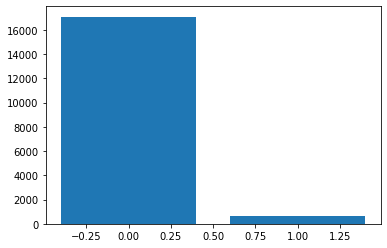

In [6]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=17087 (50.000%)
Class=1, n=17087 (50.000%)


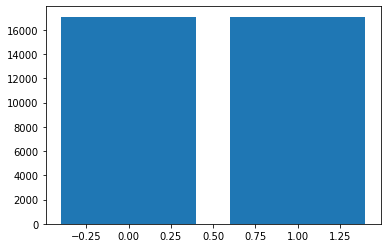

In [7]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
# summarize distribution
counter = Counter(Y)
for k,v in counter.items():
  per = v / len(Y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

*https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804*

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(27339, 12)
(6835, 12)
(27339,)
(6835,)


In [ ]:
'''
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)
'''

## Decision Tree

In [ ]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [ ]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 50}


Accuracy: 0.7278712509144111
              precision    recall  f1-score   support

           0       0.68      0.87      0.76      3422
           1       0.82      0.59      0.68      3413

    accuracy                           0.73      6835
   macro avg       0.75      0.73      0.72      6835
weighted avg       0.75      0.73      0.72      6835

[[2977  445]
 [1415 1998]]


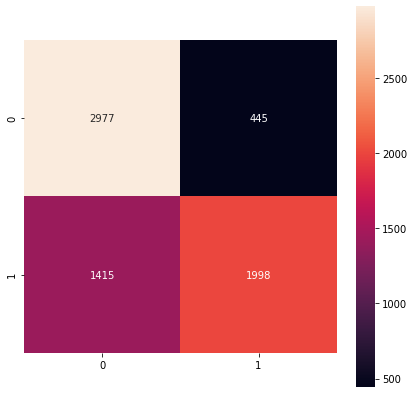

In [ ]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_model.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))


In [ ]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

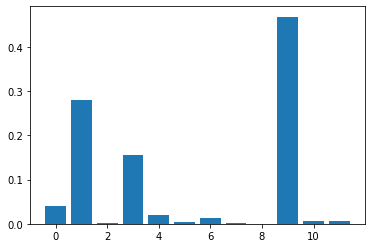

In [ ]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
my_model = CV_rfc.best_estimator_
RF =my_model.fit(X_train, Y_train)


In [ ]:
y_pred = RF.predict(X_test)

Accuracy: 0.7360643745427944
              precision    recall  f1-score   support

           0       0.69      0.88      0.77      3422
           1       0.83      0.60      0.69      3413

    accuracy                           0.74      6835
   macro avg       0.76      0.74      0.73      6835
weighted avg       0.76      0.74      0.73      6835

[[2995  427]
 [1377 2036]]


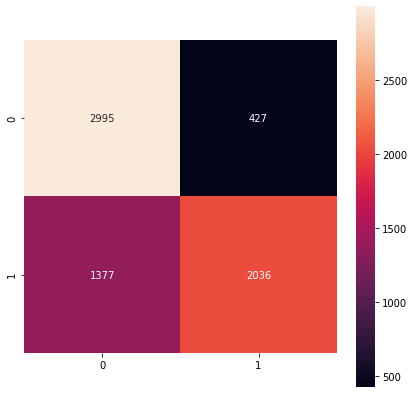

In [ ]:
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_pred))

## KNN

In [ ]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model=KNeighborsClassifier()

grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 23}


In [ ]:
my_model = grid.best_estimator_

Accuracy: 0.7350402340892466
              precision    recall  f1-score   support

           0       0.68      0.88      0.77      3422
           1       0.83      0.59      0.69      3413

    accuracy                           0.74      6835
   macro avg       0.76      0.73      0.73      6835
weighted avg       0.76      0.74      0.73      6835

[[3010  412]
 [1399 2014]]


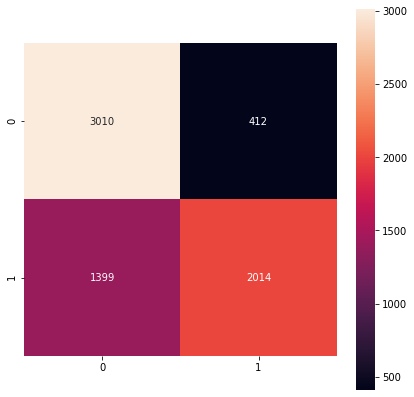

In [ ]:
my_model.fit(X_train, Y_train)
y_predicted = my_model.predict(X_test)
print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()


## SVM

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy: 0.7407461594732992
              precision    recall  f1-score   support

           0       0.69      0.89      0.77      3422
           1       0.84      0.59      0.69      3413

    accuracy                           0.74      6835
   macro avg       0.76      0.74      0.73      6835
weighted avg       0.76      0.74      0.73      6835

[[3046  376]
 [1396 2017]]


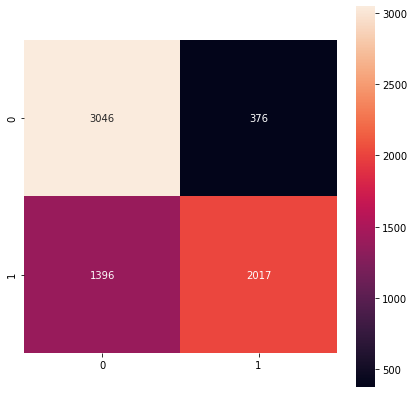

In [ ]:
y_pred = grid.predict(X_test)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network

In [10]:
def baseline_model():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [11]:
model = baseline_model()

history = model.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  workers=-1)

Epoch 1/50
49/49 [==============================] - 22s 21ms/step - loss: 0.7408 - binary_accuracy: 0.5950 - val_loss: 0.6802 - val_binary_accuracy: 0.6295
Epoch 2/50
49/49 [==============================] - 0s 7ms/step - loss: 0.5805 - binary_accuracy: 0.6940 - val_loss: 0.6844 - val_binary_accuracy: 0.6072
Epoch 3/50
49/49 [==============================] - 0s 6ms/step - loss: 0.5746 - binary_accuracy: 0.7049 - val_loss: 0.6768 - val_binary_accuracy: 0.6255
Epoch 4/50
49/49 [==============================] - 0s 7ms/step - loss: 0.5620 - binary_accuracy: 0.7192 - val_loss: 0.6752 - val_binary_accuracy: 0.6207
Epoch 5/50
49/49 [==============================] - 0s 7ms/step - loss: 0.5575 - binary_accuracy: 0.7265 - val_loss: 0.6578 - val_binary_accuracy: 0.6368
Epoch 6/50
49/49 [==============================] - 0s 6ms/step - loss: 0.5528 - binary_accuracy: 0.7171 - val_loss: 0.6602 - val_binary_accuracy: 0.6328
Epoch 7/50
49/49 [==============================] - 0s 7ms/step - loss: 0.

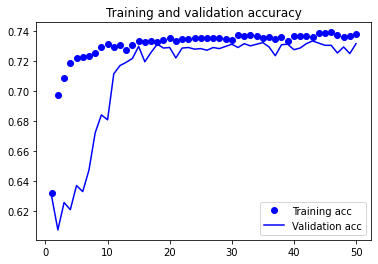

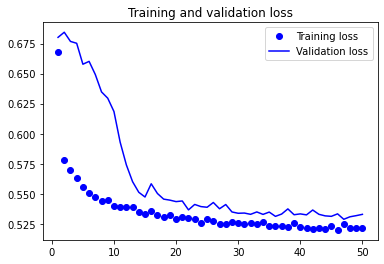

In [12]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

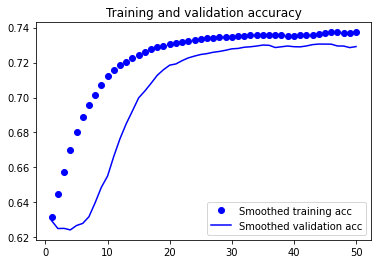

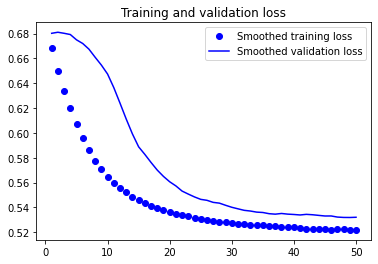

In [13]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [14]:
model.evaluate(X_test, Y_test)

214/214 [==============================] - 0s 2ms/step - loss: 0.5321 - binary_accuracy: 0.7368


[0.5320567488670349, 0.7367959022521973]

Total accuracy: 73.67959034381857 %
[[3031  391]
 [1408 2005]]


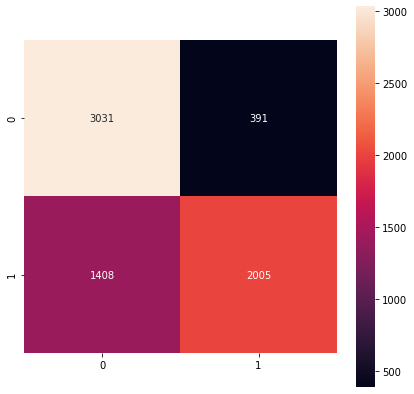

In [16]:
predicted = np.array([int(x[0] > 0.5) for x in model.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network V2

In [17]:
def baseline_model2():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [18]:
model2 = baseline_model2()

history = model2.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  workers=-1)

Epoch 1/50
49/49 [==============================] - 1s 8ms/step - loss: 0.8054 - binary_accuracy: 0.5617 - val_loss: 0.6509 - val_binary_accuracy: 0.5007
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.6473 - binary_accuracy: 0.6719 - val_loss: 0.6417 - val_binary_accuracy: 0.5007
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 0.6132 - binary_accuracy: 0.6811 - val_loss: 0.6243 - val_binary_accuracy: 0.5007
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.5912 - binary_accuracy: 0.7001 - val_loss: 0.6093 - val_binary_accuracy: 0.6770
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.5785 - binary_accuracy: 0.7019 - val_loss: 0.5940 - val_binary_accuracy: 0.6884
Epoch 6/50
49/49 [==============================] - 0s 3ms/step - loss: 0.5759 - binary_accuracy: 0.7068 - val_loss: 0.5811 - val_binary_accuracy: 0.7056
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.56

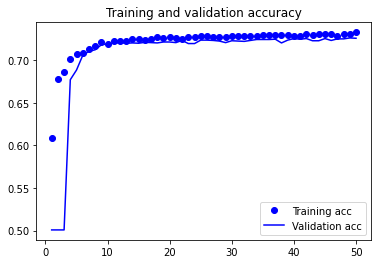

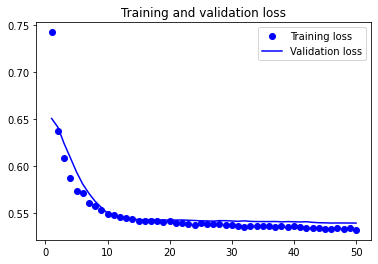

In [19]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

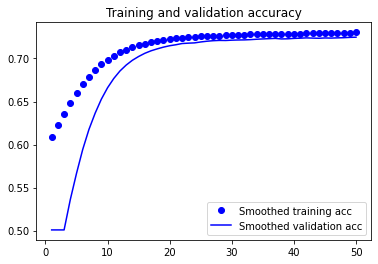

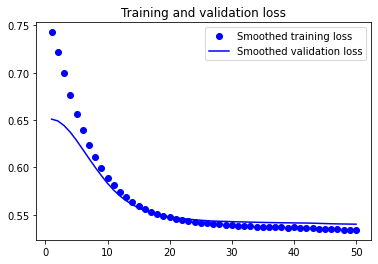

In [20]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [21]:
model2.evaluate(X_test, Y_test)

214/214 [==============================] - 0s 2ms/step - loss: 0.5328 - binary_accuracy: 0.7292


[0.5328407287597656, 0.7291880249977112]

Total accuracy: 72.91880029261156 %
[[3016  406]
 [1445 1968]]


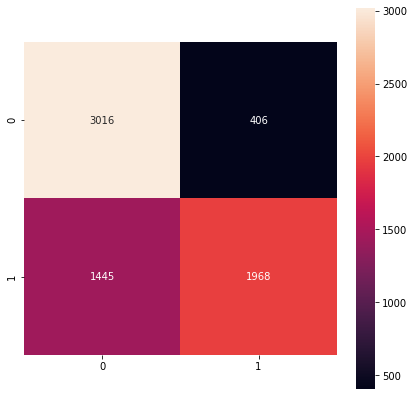

In [22]:
predicted = np.array([int(x[0] > 0.5) for x in model2.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()